In [4]:
# ---- Basic imports and version check.
import os
import sys
print(sys.version)
import numpy
import matplotlib.pyplot as plt


3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]


In [15]:
############## check if I need to do this ?????????
sys.path.append('/home/taghreed.bahlool/deepsky/')
from deepsky.deepWavelet import *


In [29]:
# ---- Add location of deepsky package to path and import deepWavelet.
sys.path.append('/home/patrick.sutton/deepsky/')
from deepsky.deepWavelet import *

In [30]:
# ---- Load some example data: 500 CBC injections in background noise for each of the three detectors H, L, V.
cusp_data = np.load('cusp_real_noise_whitened.npz')
print(cusp_data)

NpzFile 'cusp_real_noise_whitened.npz' with keys: X, y, snr, f_high


In [31]:
strain = cusp_data['X']
labels = cusp_data['y']


In [32]:
print(np.array([example_strain]).shape) 


(1, 1024)


In [23]:
print(strain.shape)
print(strain[0].shape)
print(np.array([strain[0]]).shape)


(10000, 1024)
(1024,)
(1, 1024)


In [25]:
import numpy as np

# Pull one example
single_signal = strain[0]               # shape = (1024,)
batched_signal = np.array([single_signal])  # shape = (1, 1024)

print("batched_signal.shape =", batched_signal.shape)
print("type(batched_signal) =", type(batched_signal))
print("type(batched_signal[0]) =", type(batched_signal[0]))
print("batched_signal[0].shape =", batched_signal[0].shape)


batched_signal.shape = (1, 1024)
type(batched_signal) = <class 'numpy.ndarray'>
type(batched_signal[0]) = <class 'numpy.ndarray'>
batched_signal[0].shape = (1024,)


In [26]:
denoised, params = denoiseAtoms(
    batched_signal,
    wavelet='db4',
    percentage=90,
    sampling_rate=1024,
    union_threshold=0.6,
    z_threshold=3.0
)


AxisError: Axis greater than data dimensions

In [28]:
denoised, params = denoiseAtoms(
    np.array([strain[0]]),  # (1, 1024)
    wavelet='db4',
    percentage=90,
    sampling_rate=1024,
    union_threshold=0.6,
    z_threshold=3.0
)


AxisError: Axis greater than data dimensions

In [35]:
# ---- Perform wavelet denoising of all 500 x 3 injections.
den_cbc, den_cbc_param = denoiseAtoms(cusp_data, wavelet='db4', percentage=90, sampling_rate=1024, union_threshold=0.6, z_threshold=3.0)


AxisError: Axis greater than data dimensions

In [68]:
# ---- Print a list of all variables defined in this workspace.
# dir()

Text(0, 0.5, 'whitened strain')

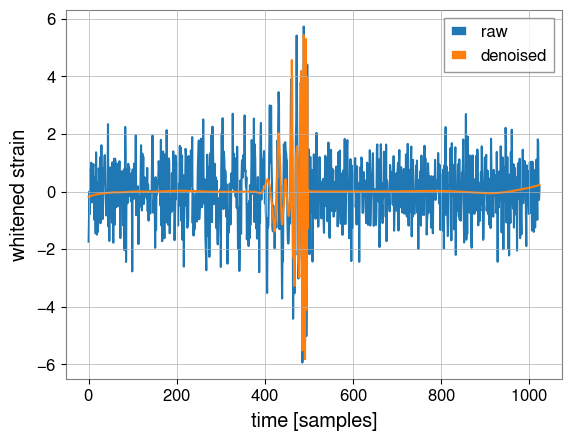

In [6]:
# ---- Plot one whitened injection with noise before and after wavelet denoising.
# ---- Select one injection.
inj_num = 201  # on range [0,1,...,499]
ifo = 1      # 0 = H, 1 = L, 2 = V

# ---- Plot it.
figID = 1
plt.figure(figID)
plt.plot(cbc_data[inj_num][ifo], label="raw")
plt.plot(den_cbc[inj_num][ifo], label="denoised")

# ---- Format and save plot.
plt.legend()
plt.xlabel('time [samples]')
plt.ylabel('whitened strain')
# plt.xlim(500, 620)
# plt.ylim(1e-25, 1e-21)
# #plt.savefig('test_gwb_' + str(ifile) + '_ifo_' + detectors[ifo] + '.png')


In [ ]:
# plt.figure(ifo)
# plt.semilogy(frequency, pow(psd,0.5), label="PSD of detrended data for detector " + detector)
# plt.semilogy(frequency, pow(median_psd,0.5), label="smoothed PSD for " + detectors[ifo])
# plt.semilogy(frequency[line_centre_bin], pow(psd[line_centre_bin],0.5), "ro", label="lines in " + detectors[ifo])

